# Jesse Marshall Final Project Group 2: Projected changes in ocean temperature and ocean heat content under 
differing climate scenarios

## Observed Heat Content from 1955-2022 and How is Heat Content Calculated

# How is Heat Content Calculated?

Ocean Heat Content is calculated based on measurments of temperatures across different depths in the ocean. This calculation is a volume integral multiplied by specific heat. Heat content (H) is equal to the specific heat of sea water (Cp) times the integral of the depths from the surface or higher depth (h2) to a lower depth (h1). Then, p(z) is equal to the density of sea water times the temperature profile T(z). Heat Content is calculated in Joules per square meter (J * m^-2)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/61363d964452878f737545d348026d444f854af9)

In [91]:
import pandas as pd                          ## The following commands import important packages that are needed to complete the project.
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import cmocean 
import matplotlib.pyplot as plt
import cftime

%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6

In [64]:
x =xr.open_dataset('/home/ees_student/Marshall_FinalProject_G2/data/heat_content_anomaly_0-700_yearly.nc', decode_times = False) #This code opens the dataset for the following analysis

In [65]:
x

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 68)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 6.0 18.0 30.0 42.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [66]:
y = xr.open_dataset('/home/ees_student/Marshall_FinalProject_G2/data/heat_content_anomaly_0-2000_yearly.nc', decode_times = False) #This code opens the dataset for the following analysis

In [67]:
y

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [68]:
time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")  #This line of code sets a range of dates which are years from 1955 to 2023

In [69]:
len(time_axis_1955_2022)  #This looks for how many items are in this dataset

68

In [70]:
OHC_700 = x.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022}) #.drop removes the labels that are  every 6 months and .assign uses the previous code to assign yearly coordinates.

In [71]:
time_axis_2005_2022 = pd.date_range("2005","2023", freq="Y") #This line of code sets a range of dates which are years from 2005 to 2023

In [72]:
len(time_axis_2005_2022)

18

In [73]:
OHC_2000 =y.drop(labels='time').assign_coords(coords={"time":time_axis_2005_2022}) #.drop removes the labels that are  every 6 months and .assign uses the previous code to assign yearly coordinates.

In [74]:
#p = OHC_700.yearl_h22_NH / (10^22) #Changes Joules to GigaJoules

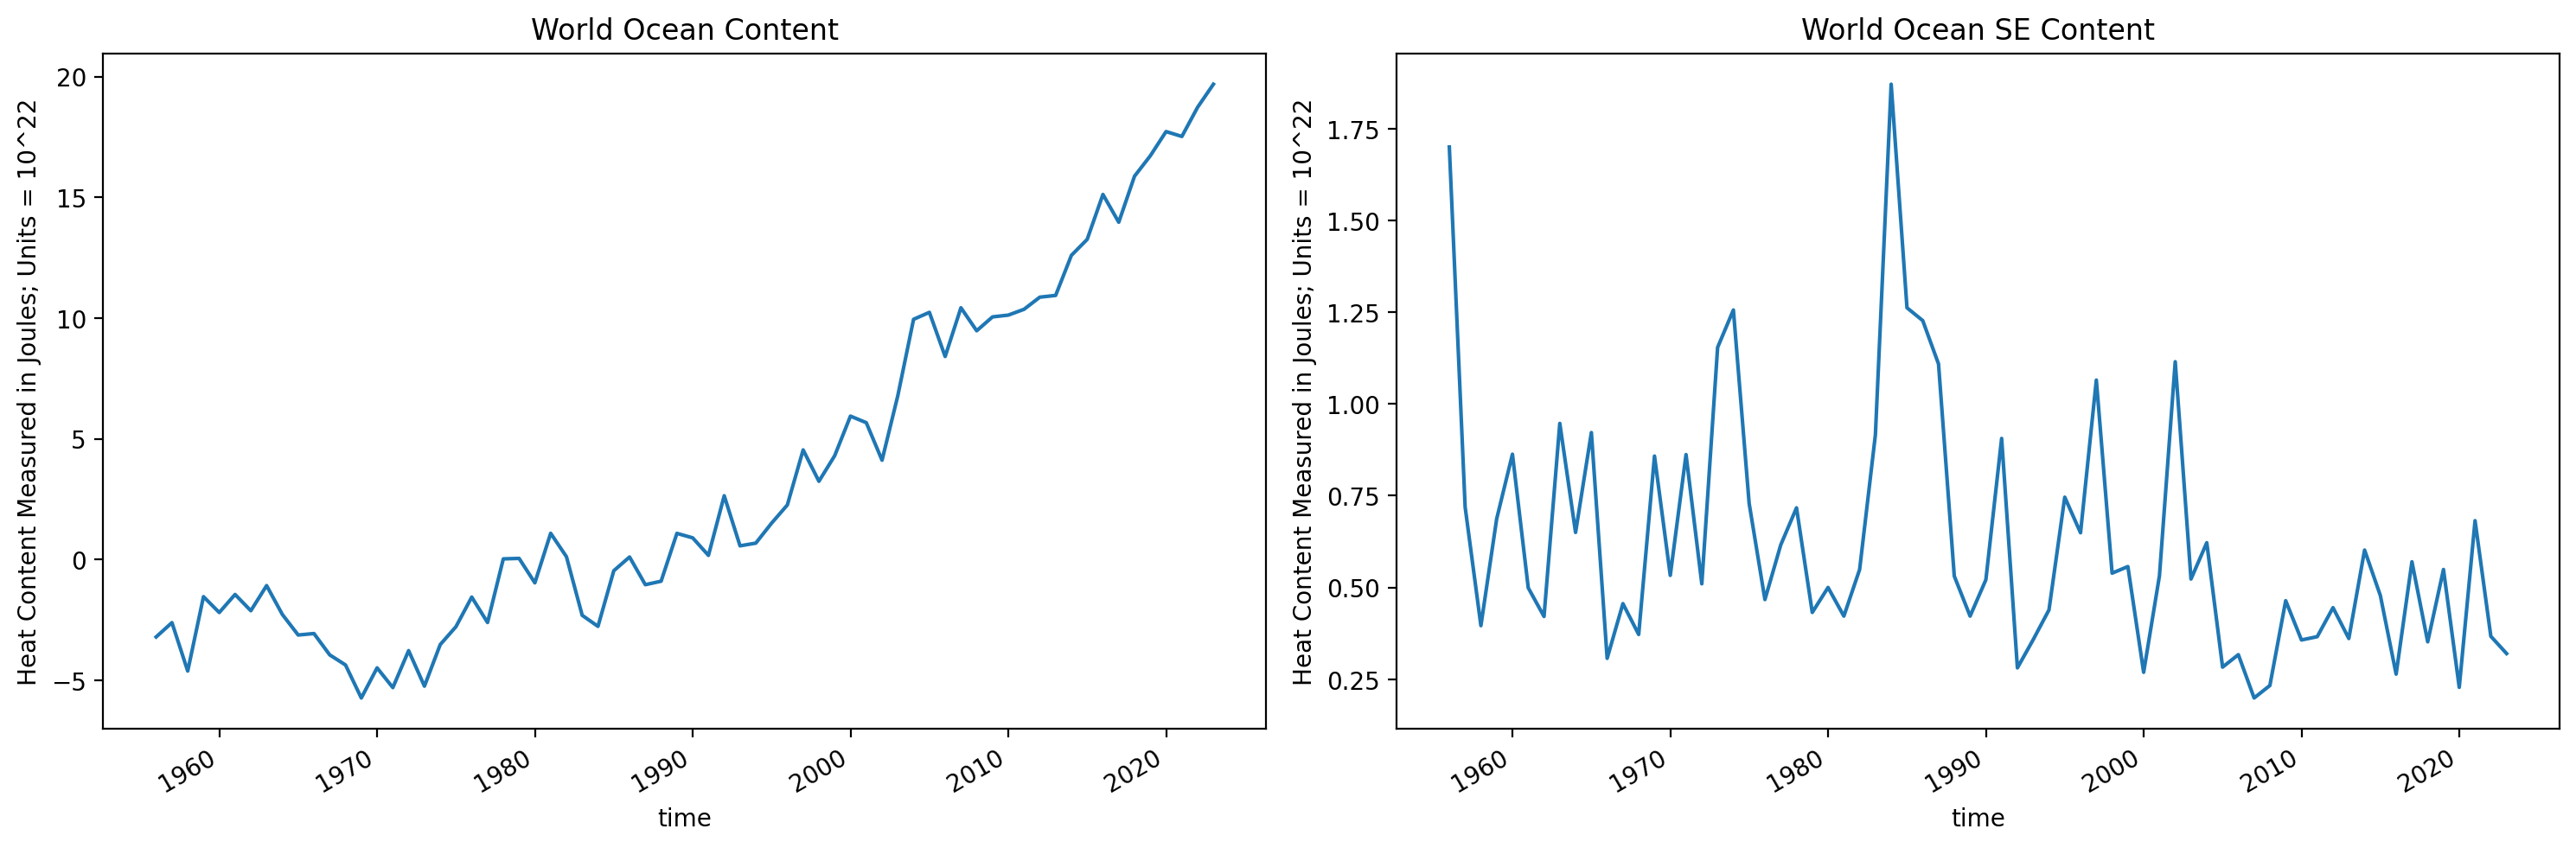

In [82]:
#World Comparison
fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,5)) ## set up our plotting area
OHC_700.yearl_h22_WO.plot(ax = ax1) ## plots on ax1
OHC_700.yearl_h22_se_WO.plot(ax=ax2) ## plots on ax2

ax1.set_title('World Ocean Content') ##sets a title for each axis figure
ax2.set_title('World Ocean SE Content')

ax1.set_ylabel('Heat Content Measured in Joules; Units = 10^22')
ax2.set_ylabel('Heat Content Measured in Joules; Units = 10^22')

plt.tight_layout() ## make it look nicely spaced!

### Figure 1: Shows two graphs. The one on the left shows the Global Heat Content Measured from 1955 to 2023. On the right, The Global Heat Content Standard Error is shown.

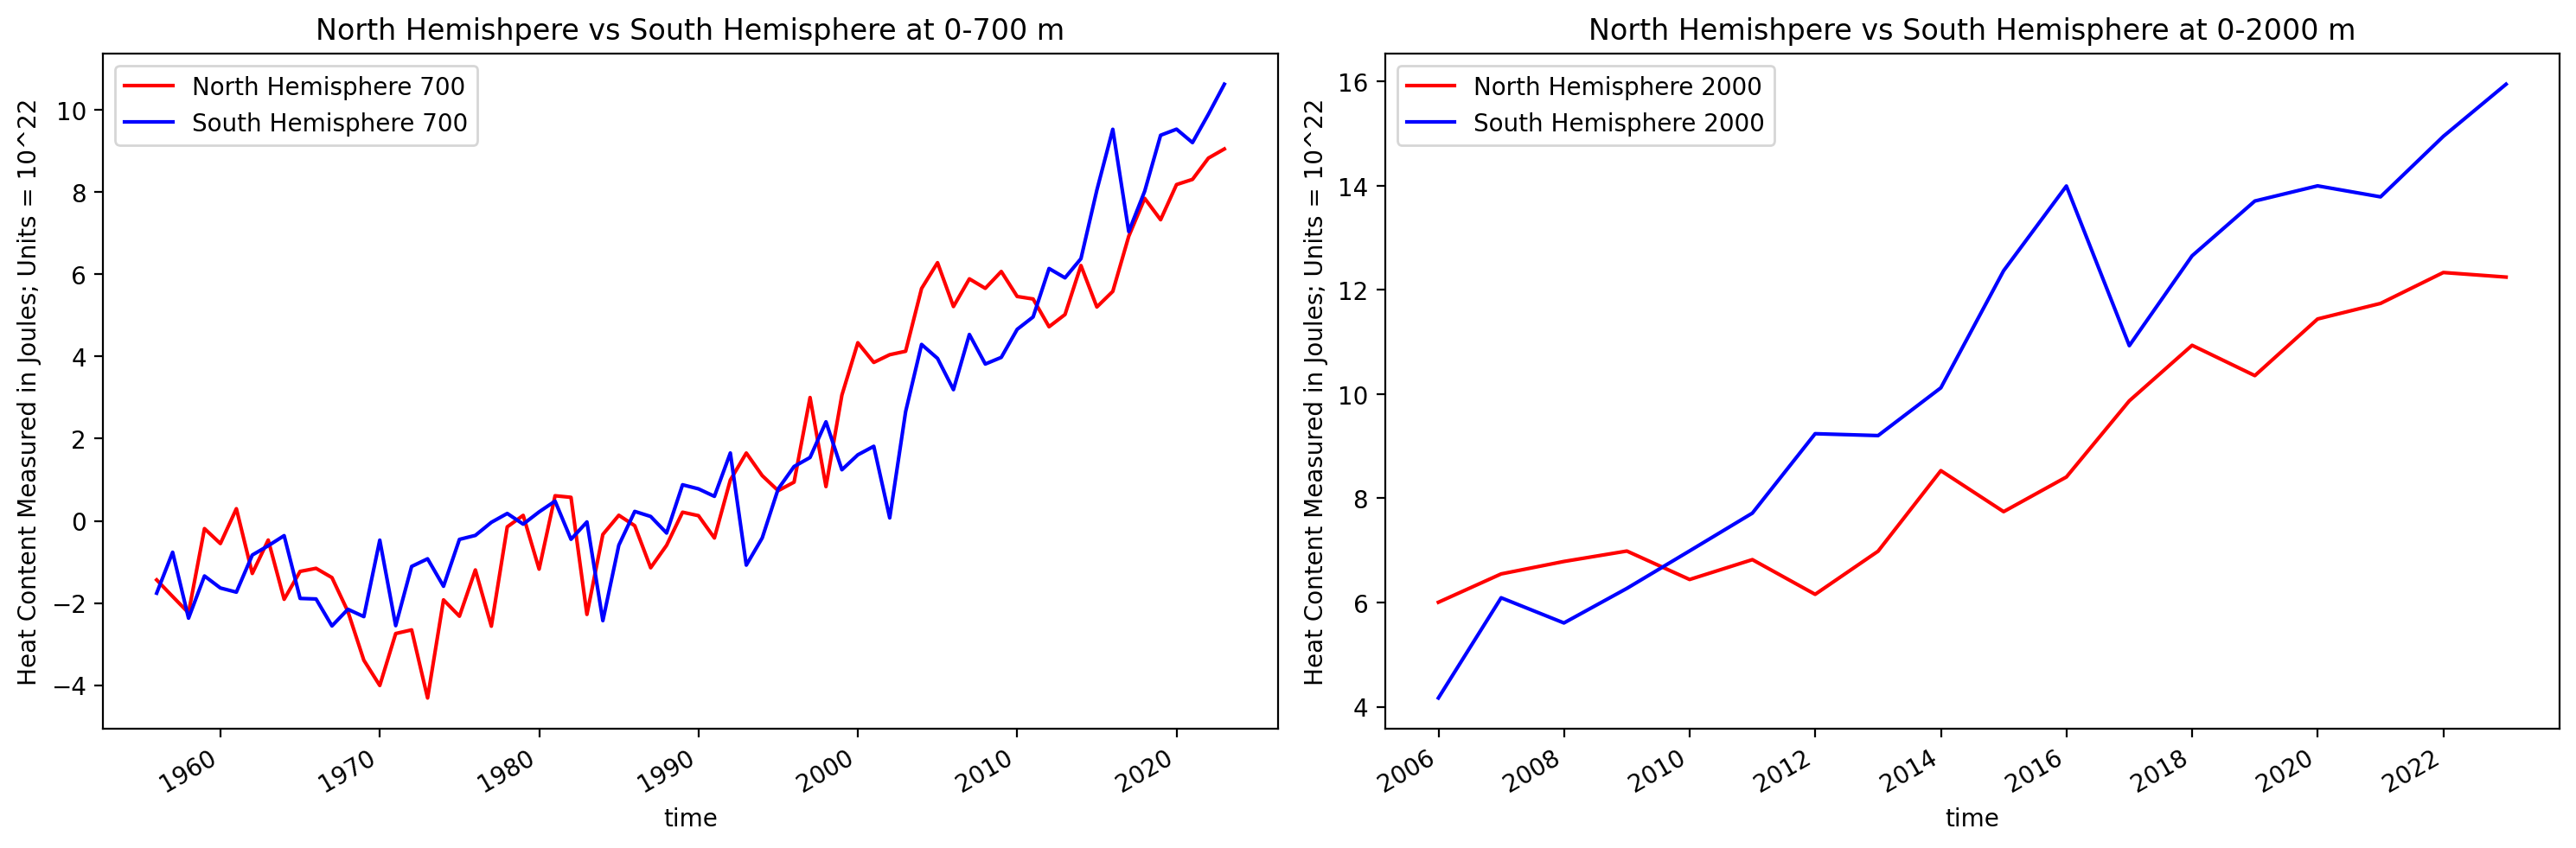

In [90]:
#Hemisphere Comparison at 0-700m 
fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,5)) ## set up our plotting area
OHC_700.yearl_h22_NH.plot(label = "North Hemisphere 700", ax=ax1, color = 'red')  ##

OHC_700.yearl_h22_SH.plot(label = "South Hemisphere 700", ax=ax1, color = 'blue')

OHC_2000.yearl_h22_NH.plot(label = "North Hemisphere 2000", ax=ax2, color = 'red')

OHC_2000.yearl_h22_SH.plot(label = "South Hemisphere 2000", ax=ax2, color = 'blue')

ax1.set_title('North Hemishpere vs South Hemisphere at 0-700 m')
ax2.set_title('North Hemishpere vs South Hemisphere at 0-2000 m')

ax1.set_ylabel('Heat Content Measured in Joules; Units = 10^22')
ax2.set_ylabel('Heat Content Measured in Joules; Units = 10^22')

ax1.legend()
ax2.legend()

plt.tight_layout() ## make it look nicely spaced!

## Figure 2: This shows two graphs, both comparing the Northern and Southern Hemispheres. On the left, we see data from 1955 to 2023 measured in Joules. This data is only from surface level to 700 meters below the surface. On the right, we see data from 2005 to 2023, also measured in Joules. This data is from the surface down to 2000 meters. Red is used to indicate the North while Blue indicates the South.

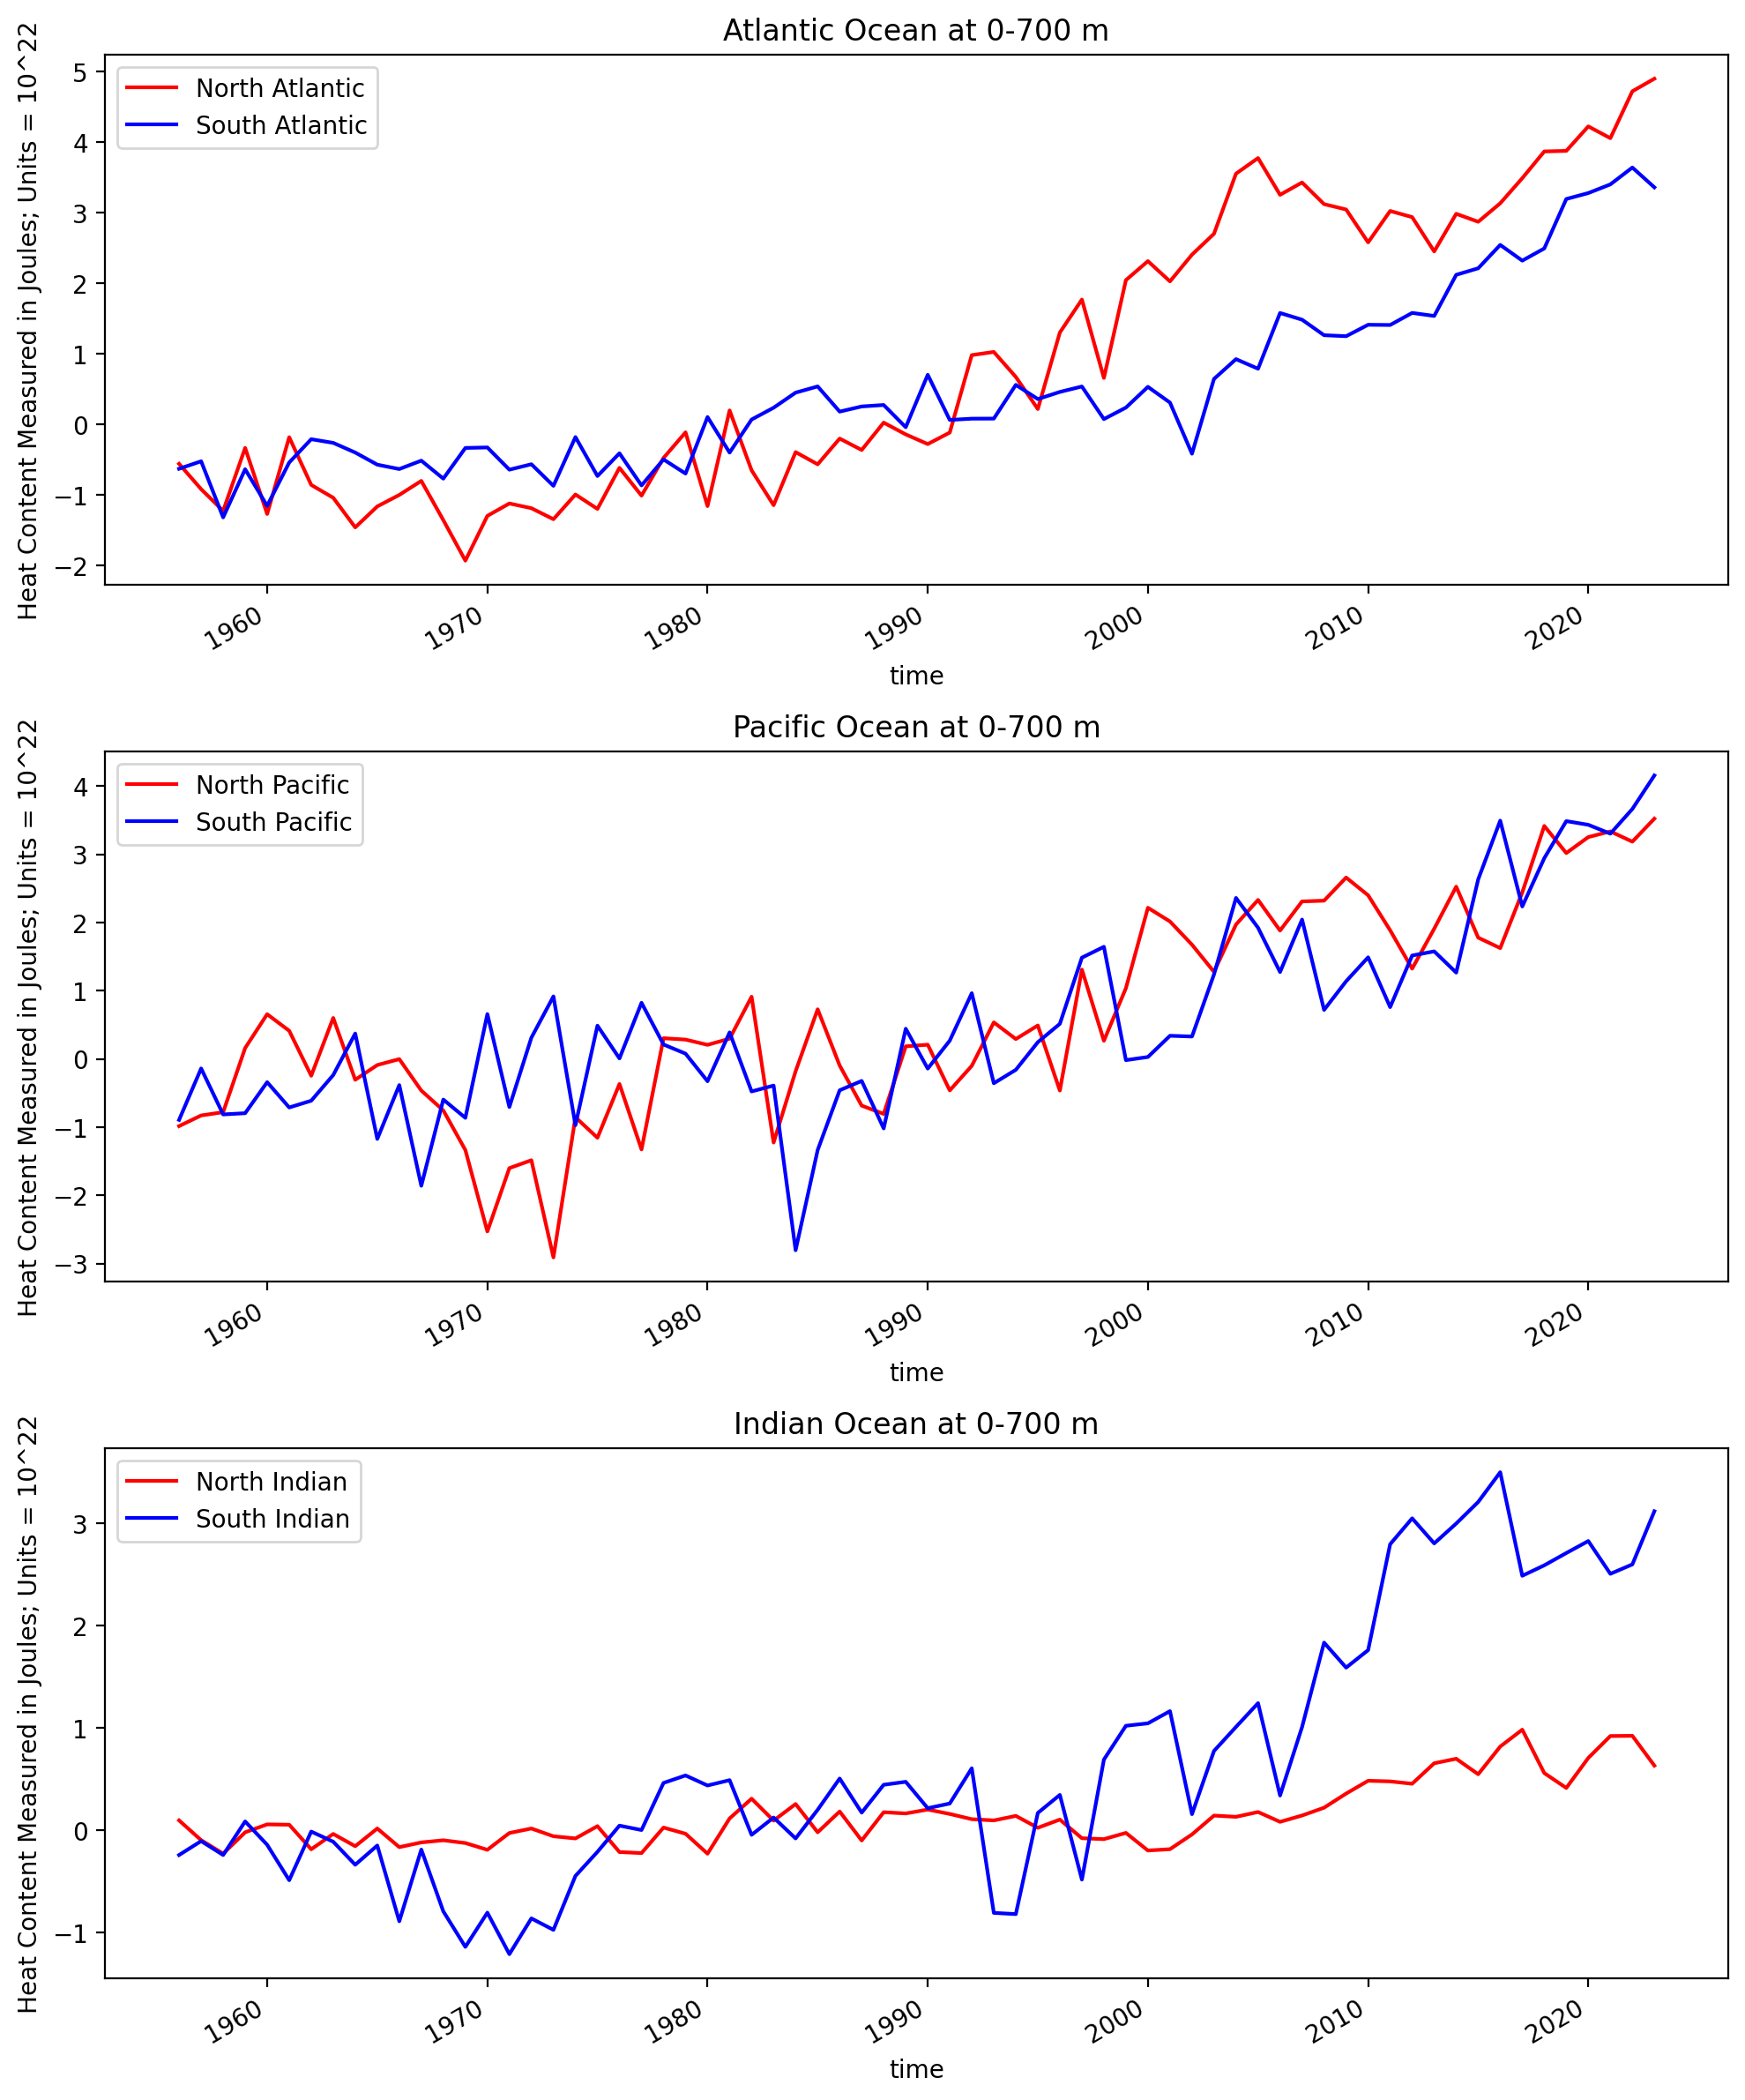

In [99]:
#3 oceans comparison
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1,nrows=3,figsize=(10,12)) ## set up our plotting area

OHC_700.yearl_h22_NA.plot(label = 'North Atlantic', color = 'red', ax=ax1)

OHC_700.yearl_h22_SA.plot(label = 'South Atlantic', color = 'blue', ax=ax1)

OHC_700.yearl_h22_NP.plot(label = 'North Pacific', color = 'red', ax=ax2)

OHC_700.yearl_h22_SP.plot(label = 'South Pacific', color = 'blue', ax=ax2)

OHC_700.yearl_h22_NI.plot(label = 'North Indian', color = 'red', ax=ax3)

OHC_700.yearl_h22_SI.plot(label = 'South Indian', color = 'blue', ax=ax3)



ax1.set_title('Atlantic Ocean at 0-700 m')
ax2.set_title('Pacific Ocean at 0-700 m')
ax3.set_title('Indian Ocean at 0-700 m')

ax1.set_ylabel('Heat Content Measured in Joules; Units = 10^22')
ax2.set_ylabel('Heat Content Measured in Joules; Units = 10^22')
ax3.set_ylabel('Heat Content Measured in Joules; Units = 10^22')

ax1.legend()   #Sets legends for each figure
ax2.legend()
ax3.legend()

plt.tight_layout() ## make it look nicely spaced!

## Figure 3: This figure is comprised of three graphs. Each graph shows the Heat Content measured in the North and South parts of the individual oceans at 700 meters. Red has been chosen to indicate the North and Blue to indicate the South. Each graph uses data from 1955 to 2023. The graphs are of the Atlantic, Pacific, and Indian Oceans.

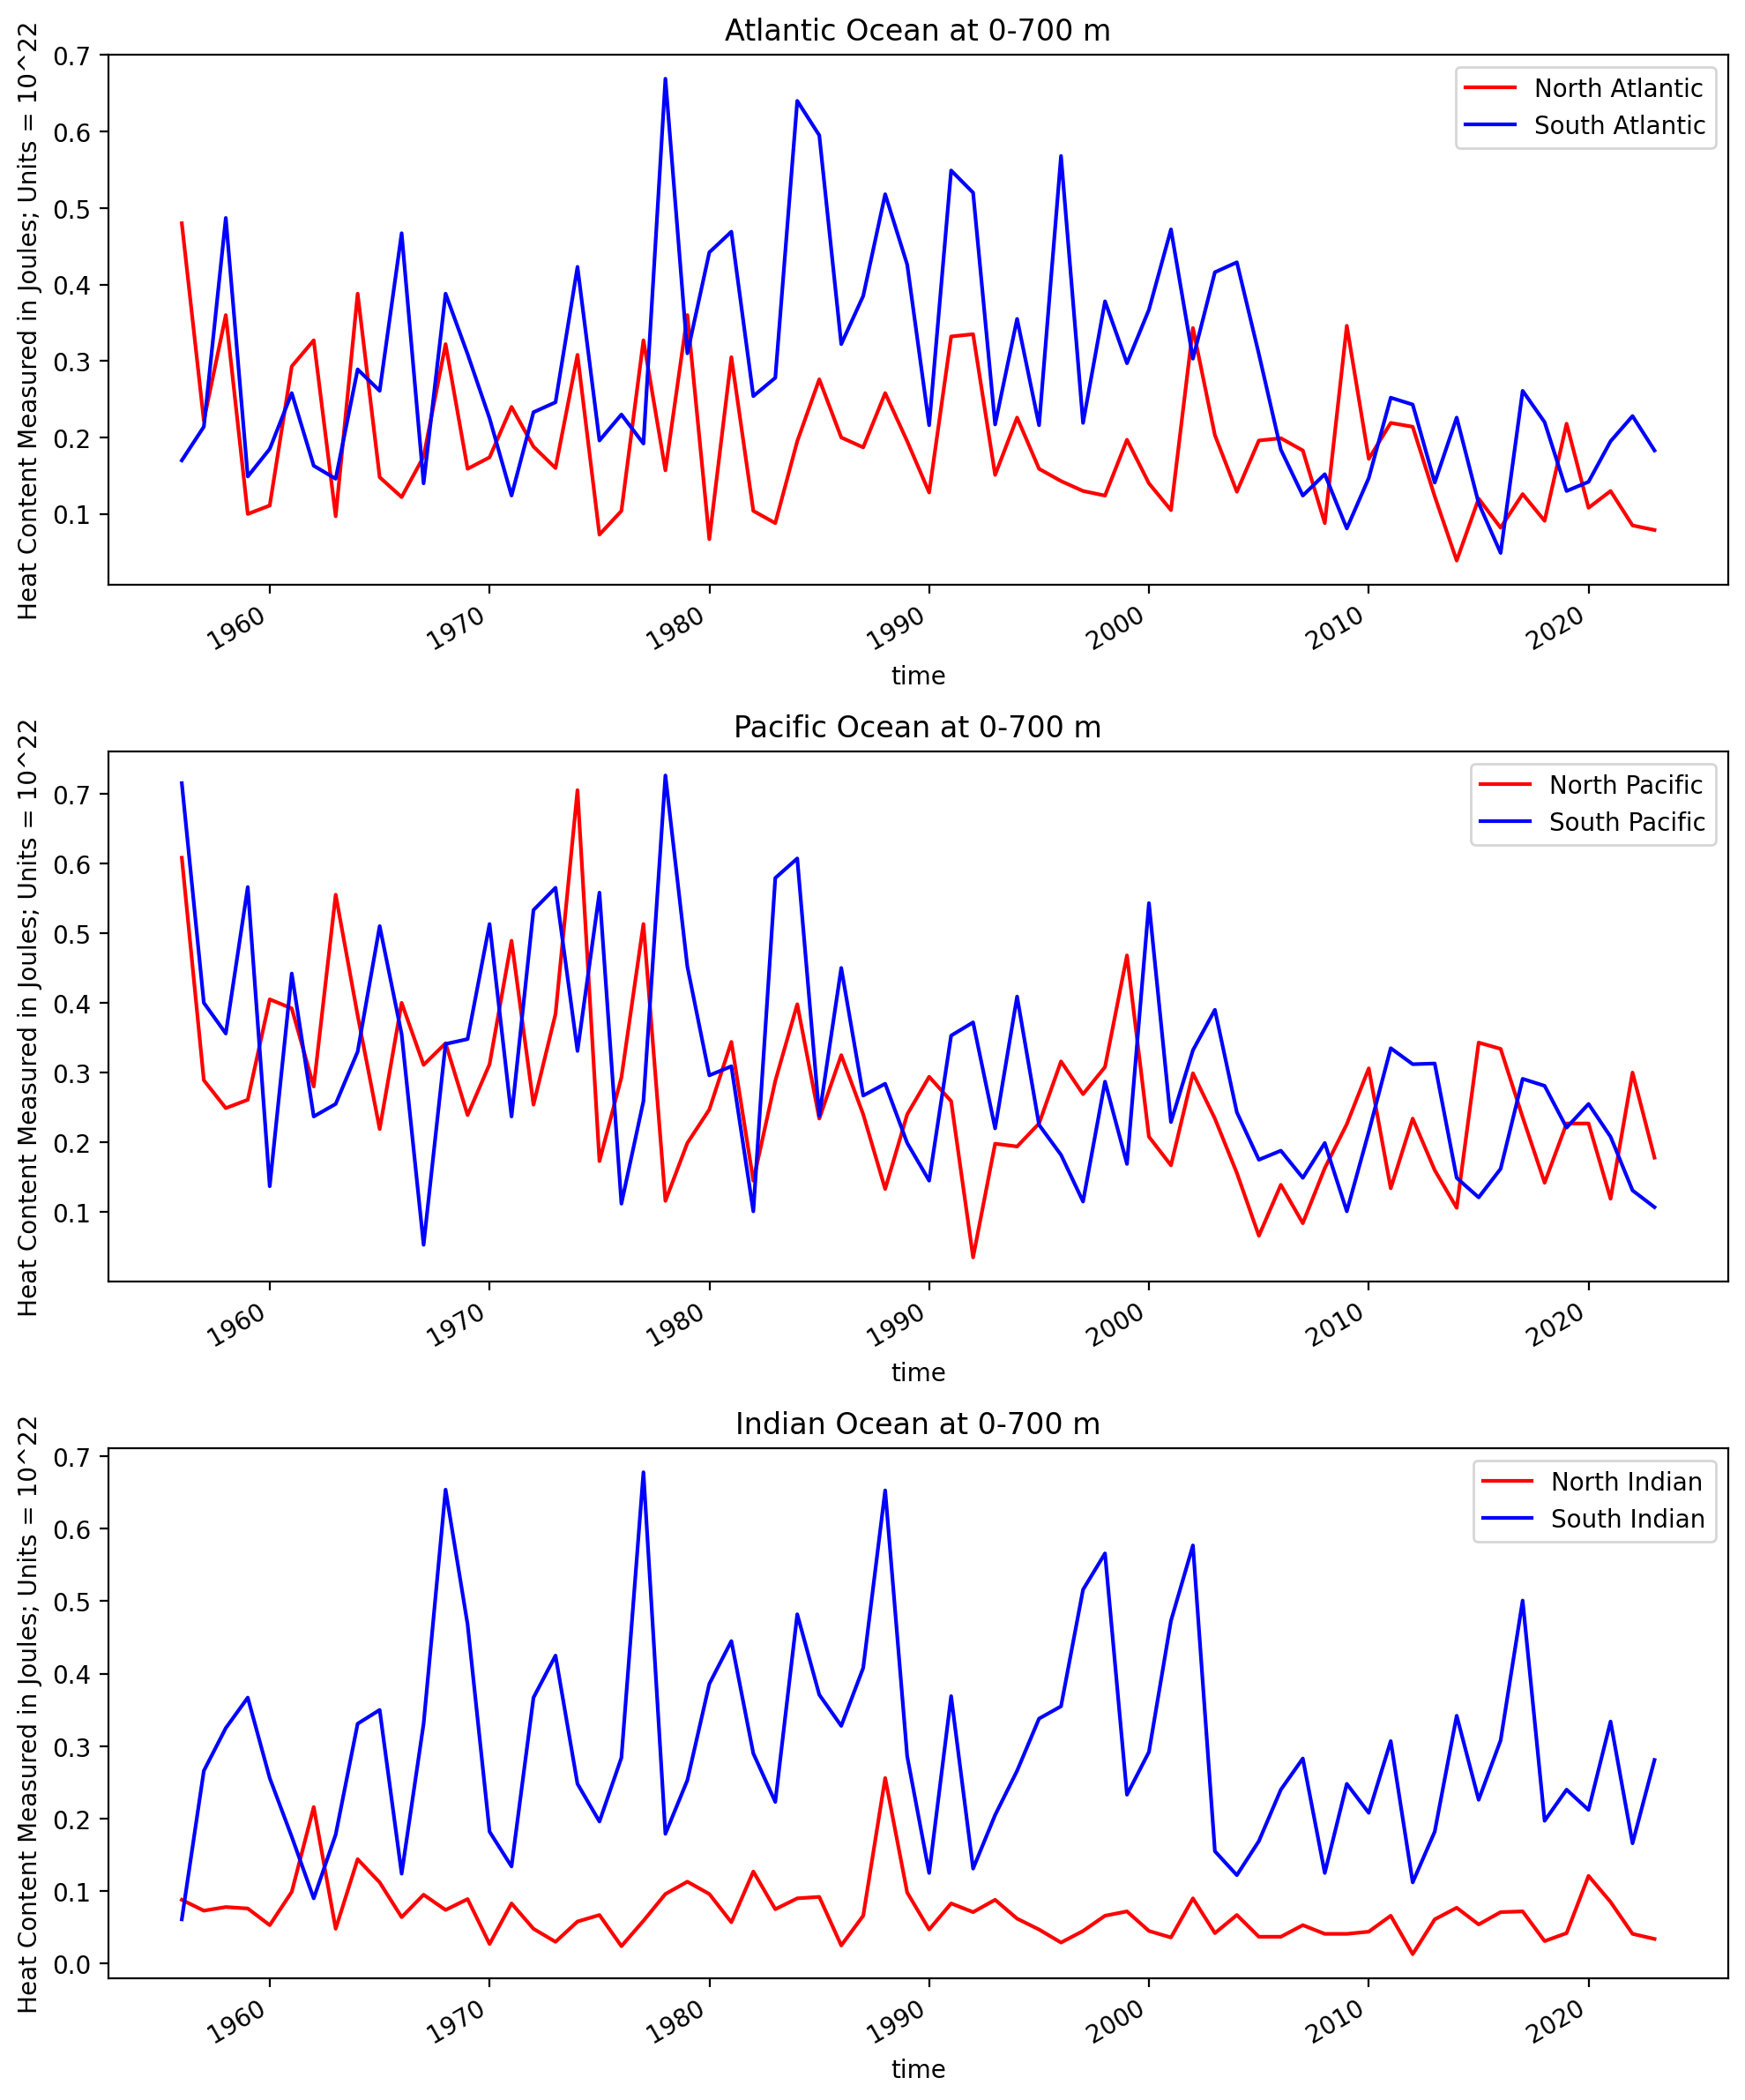

In [100]:
#3 Oceans with SE comparison
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1,nrows=3,figsize=(10,12)) ## set up our plotting area

OHC_700.yearl_h22_se_NA.plot(label = 'North Atlantic', color = 'red', ax=ax1)

OHC_700.yearl_h22_se_SA.plot(label = 'South Atlantic', color = 'blue', ax=ax1)

OHC_700.yearl_h22_se_NP.plot(label = 'North Pacific', color = 'red', ax=ax2)

OHC_700.yearl_h22_se_SP.plot(label = 'South Pacific', color = 'blue', ax=ax2)

OHC_700.yearl_h22_se_NI.plot(label = 'North Indian', color = 'red', ax=ax3)

OHC_700.yearl_h22_se_SI.plot(label = 'South Indian', color = 'blue', ax=ax3)



ax1.set_title('Atlantic Ocean at 0-700 m')
ax2.set_title('Pacific Ocean at 0-700 m')
ax3.set_title('Indian Ocean at 0-700 m')

ax1.set_ylabel('Heat Content Measured in Joules; Units = 10^22')
ax2.set_ylabel('Heat Content Measured in Joules; Units = 10^22')
ax3.set_ylabel('Heat Content Measured in Joules; Units = 10^22')

ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout() ## make it look nicely spaced!

## Figure 4: This figure is comprised of three graphs. These graphs look at the Standard Error for each dataset. Each graph represents the North and South parts of the individual oceans at 700 meters. Red has been chosen to indicate the North and Blue to indicate the South. Each graph looks at the  data from 1955 to 2023. The graphs are of the Atlantic, Pacific, and Indian Oceans.

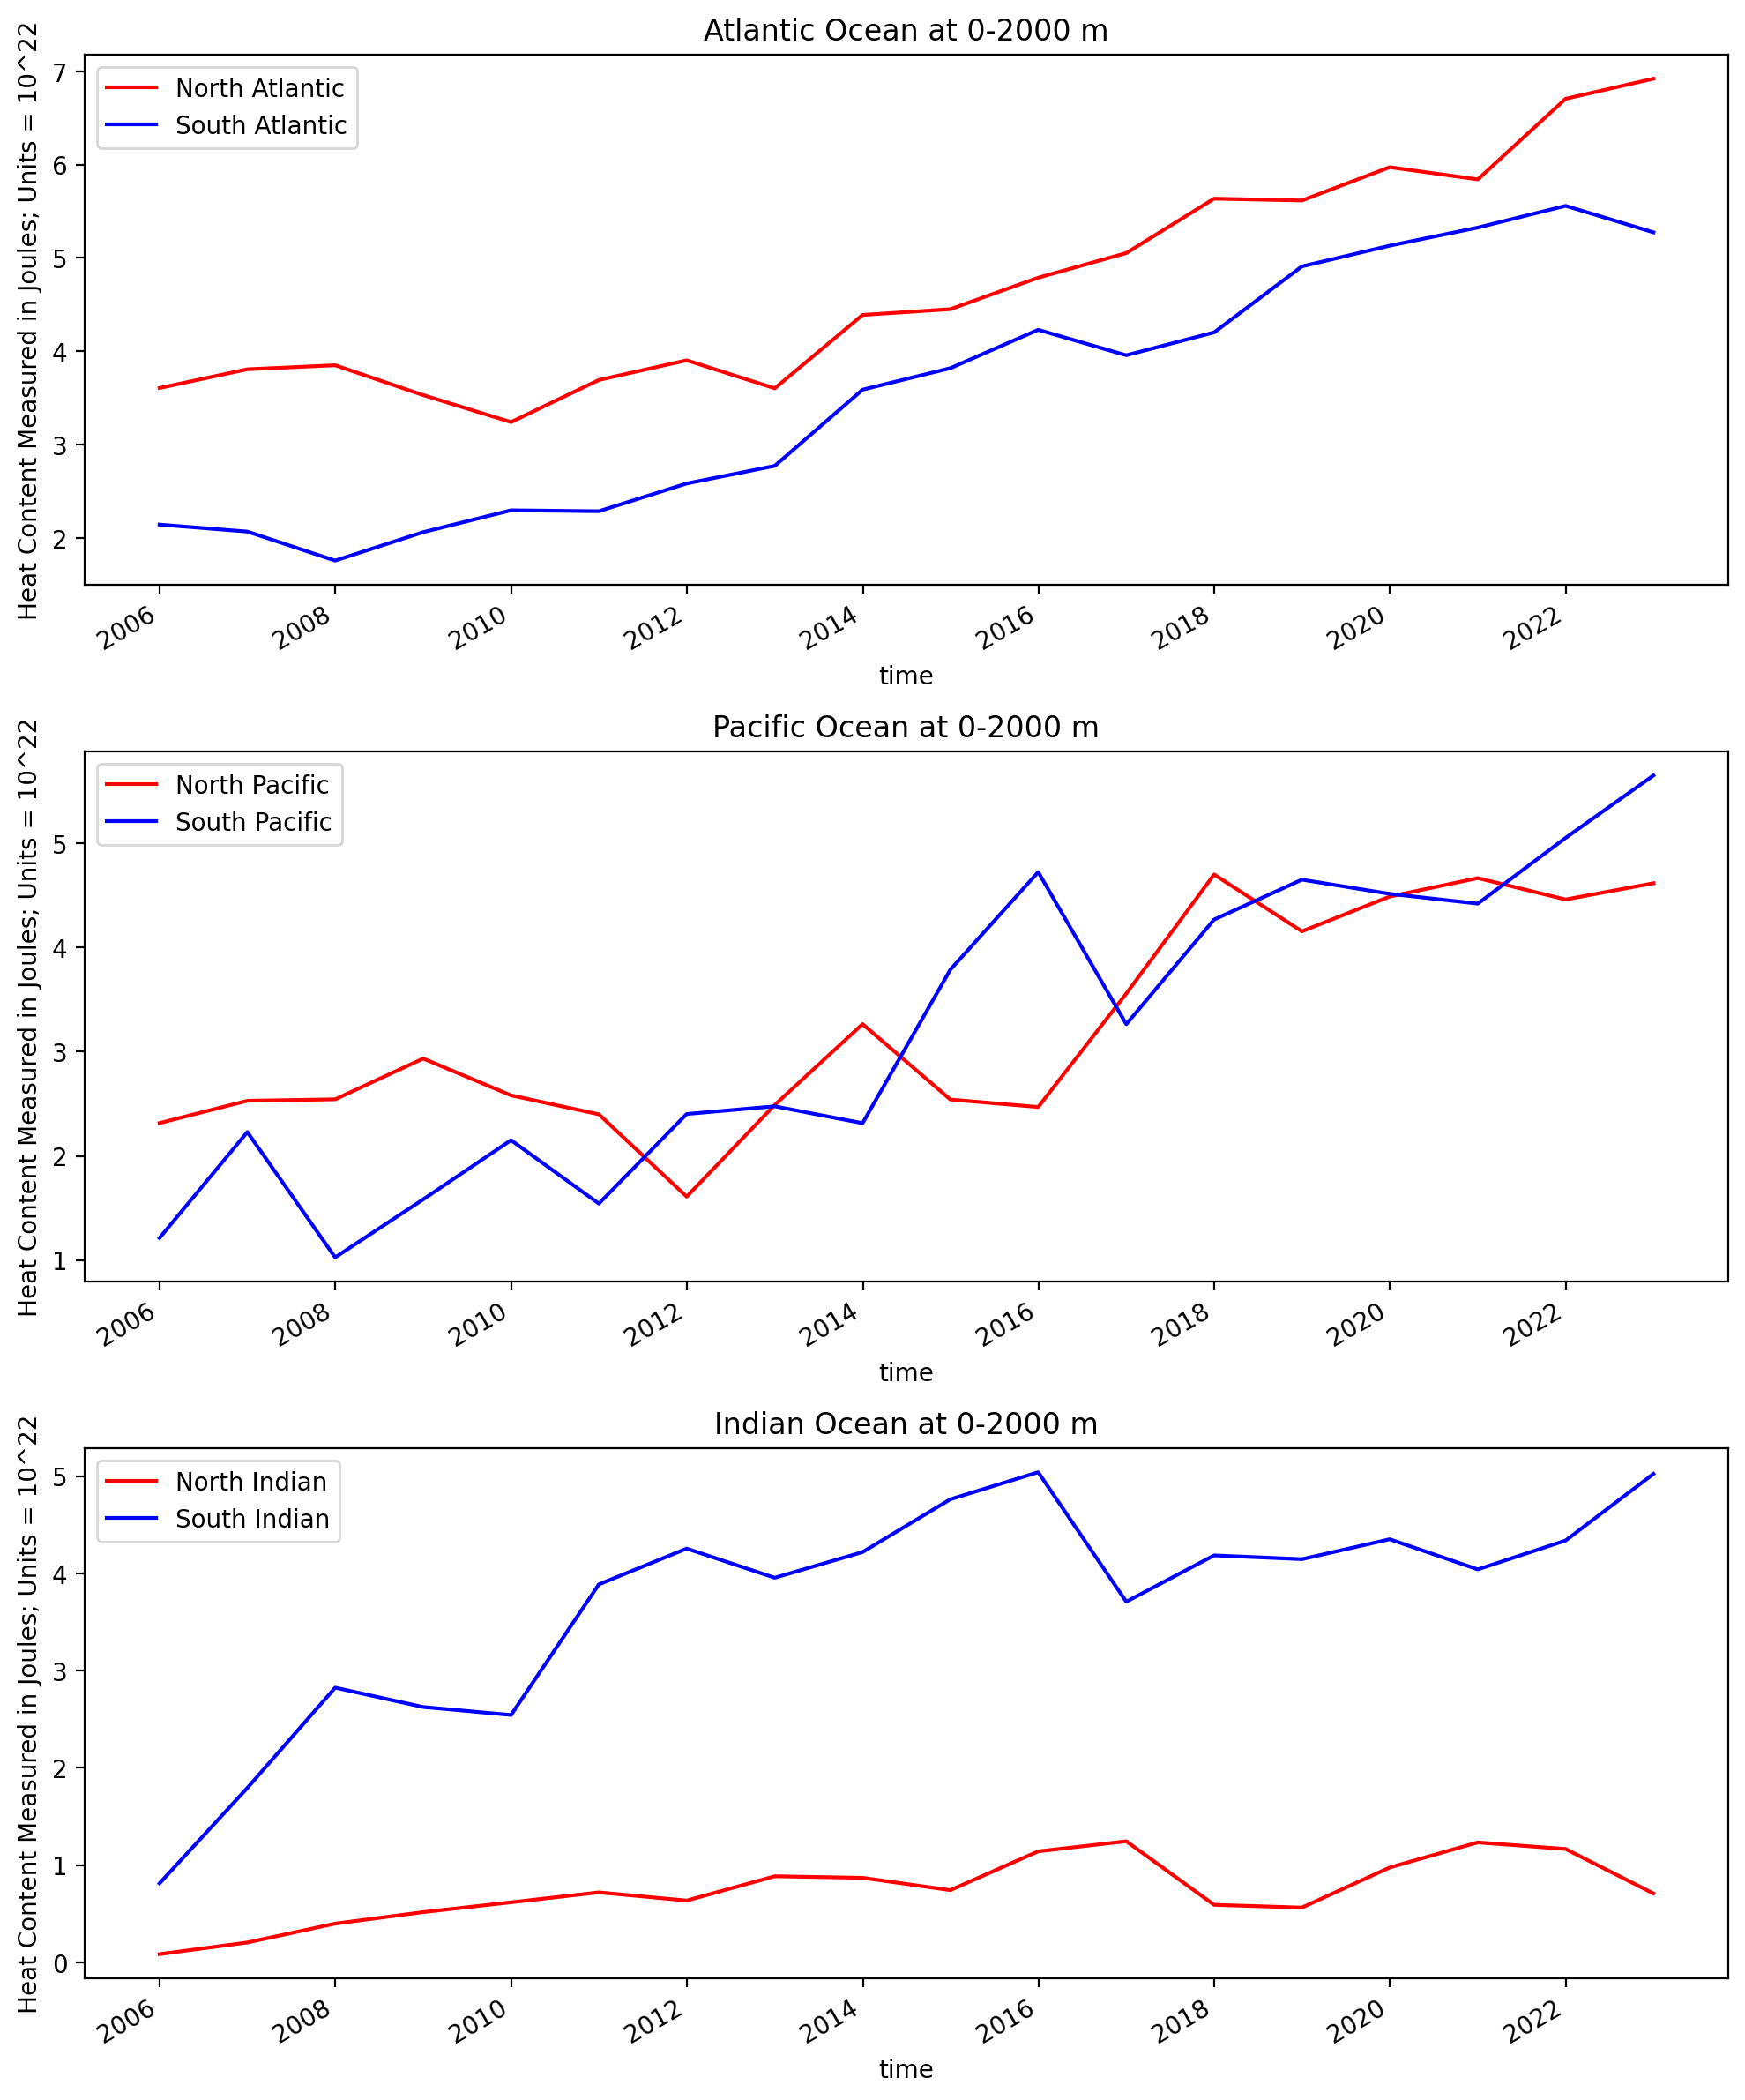

In [101]:
#3 oceans comparison at 2000 m
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1,nrows=3,figsize=(10,12)) ## set up our plotting area

OHC_2000.yearl_h22_NA.plot(label = 'North Atlantic', color = 'red', ax=ax1)

OHC_2000.yearl_h22_SA.plot(label = 'South Atlantic', color = 'blue', ax=ax1)

OHC_2000.yearl_h22_NP.plot(label = 'North Pacific', color = 'red', ax=ax2)

OHC_2000.yearl_h22_SP.plot(label = 'South Pacific', color = 'blue', ax=ax2)

OHC_2000.yearl_h22_NI.plot(label = 'North Indian', color = 'red', ax=ax3)

OHC_2000.yearl_h22_SI.plot(label = 'South Indian', color = 'blue', ax=ax3)



ax1.set_title('Atlantic Ocean at 0-2000 m')
ax2.set_title('Pacific Ocean at 0-2000 m')
ax3.set_title('Indian Ocean at 0-2000 m')

ax1.set_ylabel('Heat Content Measured in Joules; Units = 10^22')
ax2.set_ylabel('Heat Content Measured in Joules; Units = 10^22')
ax3.set_ylabel('Heat Content Measured in Joules; Units = 10^22')

ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout() ## make it look nicely spaced!

## Figure 5: This figure is comprised of three graphs. Each graph shows the Heat Content measured in the North and South parts of the individual oceans at 2000 meters. Red has been chosen to indicate the North and Blue to indicate the South. Each graph uses data from 1955 to 2023. The graphs are of the Atlantic, Pacific and Indian Oceans.

# What basins accumulate more heat, North vs South hemisphere, Analysis of why,

The heat content of the oceans has been rising gradually over the years. Both the North and South hemispheres have similar incremental increases. From 0 to 700 meters, both the Atlantic and Pacific Oceans show similar rising. The Indian Ocean is somewhat of an outlier, being that there is less rise in the northern Indian Ocean. At 0-2000 meters, the data is more variable, however, all three datasets show similar information to the 0-700 graph. By looking at the standard error graph, we can see that as we continue to collect data, our methods are becoming more precise. Overall, the temperature of the water in the oceans is consistently rising.  